In [12]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
datalatih = pd.read_excel("data testing.xlsx")
datalatih.head(11)

,Jurusan,Kimia,Bahasa Inggris,Bahasa Indonesia,Prestasi Siswa,Prestasi Sekolah
0,Kimia,100,89,80,3,1
1,Kimia,89,90,80,1,2
2,Sastra Inggris,78,77,76,2,1
3,Kimia,90,88,80,1,1
4,Sastra Inggris,95,100,100,1,1
5,Kimia,86,79,84,2,2
6,Sastra Indonesia,79,77,90,2,1
7,Sastra Indonesia,84,99,100,1,1
8,Sastra Inggris,77,90,85,1,1
9,Sastra Inggris,95,87,77,2,2


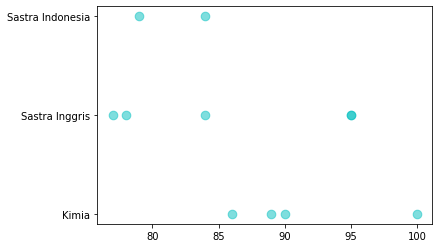

In [15]:
from sklearn.cluster import KMeans
plt.scatter(datalatih.Kimia, datalatih.Jurusan, s = 75, c = "c", marker = "o", alpha = 0.5)
plt.show()

In [16]:
x = datalatih.drop(["Jurusan"], axis=1)
x.head(11)

,Kimia,Bahasa Inggris,Bahasa Indonesia,Prestasi Siswa,Prestasi Sekolah
0,100,89,80,3,1
1,89,90,80,1,2
2,78,77,76,2,1
3,90,88,80,1,1
4,95,100,100,1,1
5,86,79,84,2,2
6,79,77,90,2,1
7,84,99,100,1,1
8,77,90,85,1,1
9,95,87,77,2,2


In [17]:
y = datalatih["Jurusan"]
y.head(11)

0                Kimia
1                Kimia
2       Sastra Inggris
3                Kimia
4       Sastra Inggris
5                Kimia
6     Sastra Indonesia
7     Sastra Indonesia
8       Sastra Inggris
9       Sastra Inggris
10      Sastra Inggris
Name: Jurusan, dtype: object

In [18]:
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB

modelnb = GaussianNB()

nbtrain = modelnb.fit(x, y)
datauji = pd.read_excel("data testing.xlsx")
datauji.head(11)

,Jurusan,Kimia,Bahasa Inggris,Bahasa Indonesia,Prestasi Siswa,Prestasi Sekolah
0,Kimia,100,89,80,3,1
1,Kimia,89,90,80,1,2
2,Sastra Inggris,75,77,75,2,1
3,Kimia,90,88,80,1,1
4,Sastra Inggris,95,100,100,1,1
5,Kimia,86,79,84,2,2
6,Sastra Indonesia,79,75,90,2,1
7,Sastra Indonesia,84,99,100,1,1
8,Sastra Inggris,77,90,85,1,1
9,Sastra Inggris,95,87,77,2,2


In [19]:
x_test = datauji.drop(["Jurusan"], axis=1)
x_test.head(11)

,Kimia,Bahasa Inggris,Bahasa Indonesia,Prestasi Siswa,Prestasi Sekolah
0,100,89,80,3,1
1,89,90,80,1,2
2,75,77,75,2,1
3,90,88,80,1,1
4,95,100,100,1,1
5,86,79,84,2,2
6,79,75,90,2,1
7,84,99,100,1,1
8,77,90,85,1,1
9,95,87,77,2,2


In [20]:
y_uji = datauji["Jurusan"]
y_uji.head(11)

0                Kimia
1                Kimia
2       Sastra Inggris
3                Kimia
4       Sastra Inggris
5                Kimia
6     Sastra Indonesia
7     Sastra Indonesia
8       Sastra Inggris
9       Sastra Inggris
10      Sastra Inggris
Name: Jurusan, dtype: object

In [21]:
Y_predict = nbtrain.predict(x_test)
print("Prediksi Naive Bayes : ",Y_predict)

Prediksi Naive Bayes :  ['Kimia' 'Kimia' 'Sastra Inggris' 'Kimia' 'Sastra Inggris' 'Kimia'
 'Sastra Indonesia' 'Sastra Indonesia' 'Sastra Indonesia' 'Kimia'
 'Sastra Indonesia']


In [22]:
from sklearn.metrics import accuracy_score
accuracy= accuracy_score(y_uji, Y_predict)
print("Akurasi Naive Bayes : ",accuracy)

Akurasi Naive Bayes :  0.7272727272727273


In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_uji, Y_predict))

                  precision    recall  f1-score   support

           Kimia       0.80      1.00      0.89         4
Sastra Indonesia       0.50      1.00      0.67         2
  Sastra Inggris       1.00      0.40      0.57         5

        accuracy                           0.73        11
       macro avg       0.77      0.80      0.71        11
    weighted avg       0.84      0.73      0.70        11

